# 1

In [315]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

import xgboost as xgb
from lightgbm import LGBMRegressor
# xgboost와 lightgbm은 사이킷런에 없어서 따로 깔아줘야 함


In [316]:
train = pd.read_excel('fatherson.xlsx', sheet_name='train')
test = pd.read_excel('fatherson.xlsx', sheet_name='test')

**voting system**

- ``hard voting``
    - 투표
- ``soft voting``
    - 득표율

In [317]:
train

,Father,Son
0,165.100,151.892
1,165.100,160.782
2,167.132,159.512
3,155.194,163.322
4,160.020,163.068
...,...,...
750,186.182,172.466
751,167.132,154.940
752,181.102,173.482
753,179.578,176.022


음... train 데이터를 보니 soft voting으로 가야겠군  

train data와 test data가 이미 나뉘어져 있으니 굳이  
train_test_split을 쓸 필요가 없겠군

In [318]:
X_train = train['Father']
y_train = train["Son"]

X_test = test["Father"]
y_test = test["Son"]

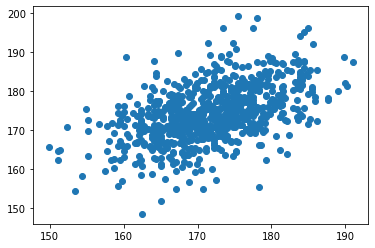

In [319]:
plt.scatter(X_train, y_train)

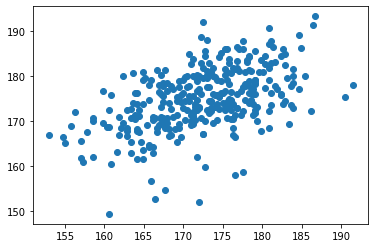

In [320]:
plt.scatter(X_test, y_test)

---

과정

``모델 선언``

``모델 학습``

``모델 예측``

In [321]:
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

In [322]:
model1 = LinearRegression()
model2 = KNeighborsRegressor(n_neighbors = 70)
model3 = DecisionTreeRegressor()

In [323]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

DecisionTreeRegressor()

In [324]:
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)
predict3 = model3.predict(X_test)

In [325]:
print("선형회귀 모델 성능: ", r2_score(y_test, predict1))
print("KNN 모델 성능: ", r2_score(y_test, predict2))
print("의사결정나무 모델 성능: ", r2_score(y_test, predict3))


선형회귀 모델 성능:  0.2519977905846619
KNN 모델 성능:  0.2474034587682693
의사결정나무 모델 성능:  0.07133438875422093


In [326]:
# predict1 = model1.predict(X_train)
# predict2 = model2.predict(X_train)
# predict3 = model3.predict(X_train)

# print("선형회귀 모델 성능: ", r2_score(y_train, predict1))
# print("KNN 모델 성능: ", r2_score(y_train, predict2))
# print("의사결정나무 모델 성능: ", r2_score(y_train, predict3))

In [327]:
# 그냥 평균
avg_predict = (predict1 + predict2 + predict3) / 3
print("그냥 평균 성능: ", r2_score(y_test, avg_predict))

그냥 평균 성능:  0.231239572054327


In [328]:
print(np.cov(predict1))
print(np.cov(predict2))
print(np.cov(predict3))
print(np.cov(avg_predict))

13.020016090787738
11.243606277665235
18.70637762177803
12.344755221828677


랜덤 포레스트를 써볼까?

In [329]:
model1 = LinearRegression()
model2 = KNeighborsRegressor(n_neighbors = 70)
model3 = RandomForestRegressor(n_estimators = 500)

In [330]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [331]:
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)
predict3 = model3.predict(X_test)

In [332]:
print("선형회귀 모델 성능: ", r2_score(y_test, predict1))
print("KNN 모델 성능: ", r2_score(y_test, predict2))
print("랜덤포레스트 모델 성능: ", r2_score(y_test, predict3))

선형회귀 모델 성능:  0.2519977905846619
KNN 모델 성능:  0.2474034587682693
랜덤포레스트 모델 성능:  0.11967074847665471


In [333]:
# 그냥 평균
avg_predict = (predict1 + predict2 + predict3) / 3
print("그냥 평균 성능: ", r2_score(y_test, avg_predict))

그냥 평균 성능:  0.2359110455092317


GBM을 써볼까?

In [334]:
model1 = LinearRegression()
model2 = KNeighborsRegressor(n_neighbors = 70)
model3 = GradientBoostingRegressor(n_estimators = 500)

In [335]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=500)

In [336]:
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)
predict3 = model3.predict(X_test)

In [337]:
print("선형회귀 모델 성능: ", r2_score(y_test, predict1))
print("KNN 모델 성능: ", r2_score(y_test, predict2))
print("GBM 모델 성능: ", r2_score(y_test, predict3))

선형회귀 모델 성능:  0.2519977905846619
KNN 모델 성능:  0.2474034587682693
GBM 모델 성능:  0.09088520188892446


In [338]:
# 그냥 평균
avg_predict = (predict1 + predict2 + predict3) / 3
print("그냥 평균 성능: ", r2_score(y_test, avg_predict))

그냥 평균 성능:  0.23312931668886638


XGboost를 써볼까?

In [339]:
model1 = LinearRegression()
model2 = KNeighborsRegressor(n_neighbors = 70)
model3 = xgb.XGBRegressor()

In [340]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [341]:
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)
predict3 = model3.predict(X_test)

In [342]:
print("선형회귀 모델 성능: ", r2_score(y_test, predict1))
print("KNN 모델 성능: ", r2_score(y_test, predict2))
print("xgb 모델 성능: ", r2_score(y_test, predict3))

선형회귀 모델 성능:  0.2519977905846619
KNN 모델 성능:  0.2474034587682693
xgb 모델 성능:  0.07841681998519068


In [343]:
# 그냥 평균
avg_predict = (predict1 + predict2 + predict3) / 3
print("그냥 평균 성능: ", r2_score(y_test, avg_predict))

그냥 평균 성능:  0.2316953136849499


LGBM을 써볼까?

In [344]:
model1 = LinearRegression()
model2 = KNeighborsRegressor(n_neighbors = 70)
model3 = LGBMRegressor()

In [345]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

LGBMRegressor()

In [346]:
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)
predict3 = model3.predict(X_test)

In [347]:
print("선형회귀 모델 성능: ", r2_score(y_test, predict1))
print("KNN 모델 성능: ", r2_score(y_test, predict2))
print("lgbm 모델 성능: ", r2_score(y_test, predict3))

선형회귀 모델 성능:  0.2519977905846619
KNN 모델 성능:  0.2474034587682693
lgbm 모델 성능:  0.18113480901854329


In [348]:
# 그냥 평균
avg_predict = (predict1 + predict2 + predict3) / 3
print("그냥 평균 성능: ", r2_score(y_test, avg_predict))

그냥 평균 성능:  0.2400927082784159


---
한 번에 다 써서 그래프로 나타내볼까?

In [349]:
model1 = LinearRegression()
model2 = KNeighborsRegressor()
model3 = DecisionTreeRegressor()
model4 = RandomForestRegressor()
model5 = GradientBoostingRegressor()
model6 = xgb.XGBRegressor()
model7 = LGBMRegressor()

In [350]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
model7.fit(X_train, y_train)

LGBMRegressor()

In [351]:
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)
predict3 = model3.predict(X_test)
predict4 = model4.predict(X_test)
predict5 = model5.predict(X_test)
predict6 = model6.predict(X_test)
predict7 = model7.predict(X_test)

In [352]:
print(r2_score(y_test, predict1))
print(r2_score(y_test, predict2))
print(r2_score(y_test, predict3))
print(r2_score(y_test, predict4))
print(r2_score(y_test, predict5))
print(r2_score(y_test, predict6))
print(r2_score(y_test, predict7))

0.2519977905846619
0.06644611196784511
0.07133438875422093
0.1197256663148275
0.18554360914749402
0.07841681998519068
0.18113480901854329


In [353]:
# 그냥 평균
avg_predict = (predict1 + predict2 + predict3+ predict4+ predict5+ predict6+ predict7) / 7
print("그냥 평균 성능: ", r2_score(y_test, avg_predict))

그냥 평균 성능:  0.17308969991459522


<BarContainer object of 8 artists>

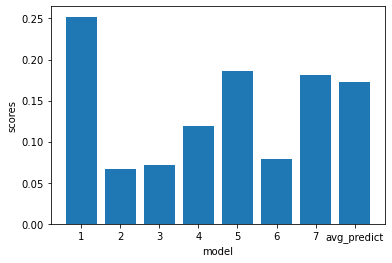

In [354]:
model = ["1", "2", "3", "4", "5", "6", "7", "avg_predict"]
score = [r2_score(y_test, predict1), r2_score(y_test, predict2),
        r2_score(y_test, predict3), r2_score(y_test, predict4),
        r2_score(y_test, predict5), r2_score(y_test, predict6),
        r2_score(y_test, predict7), r2_score(y_test, avg_predict)]
plt.xlabel("model")
plt.ylabel("scores")
plt.bar(model, score)

---

# 2

In [355]:
import seaborn as sns

In [356]:
df = pd.read_excel("Sample - Superstore.xls")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [357]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [359]:
for i in df.columns:
    print(i, len(df[i].unique()))
# 제거해도 되는 column = [Rpw ID, OrderID, Customer ID, Customer Name, Product Name]


Row ID 9994
Order ID 5009
Order Date 1237
Ship Date 1334
Ship Mode 4
Customer ID 793
Customer Name 793
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Product ID 1862
Category 3
Sub-Category 17
Product Name 1850
Sales 6144
Quantity 14
Discount 12
Profit 7545


In [360]:
erasable = ["Row ID", "Order ID", "Customer ID", "Customer Name", "Product Name"]

In [361]:
for i in erasable:
    del df[i]
df

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.5820
2,2016-06-12,2016-06-16,Second Class,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-383.0310
4,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,2014-01-21,2014-01-23,Second Class,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,2017-02-26,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,2017-02-26,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,258.5760,2,0.20,19.3932
9992,2017-02-26,2017-03-03,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [362]:
df["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [363]:
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

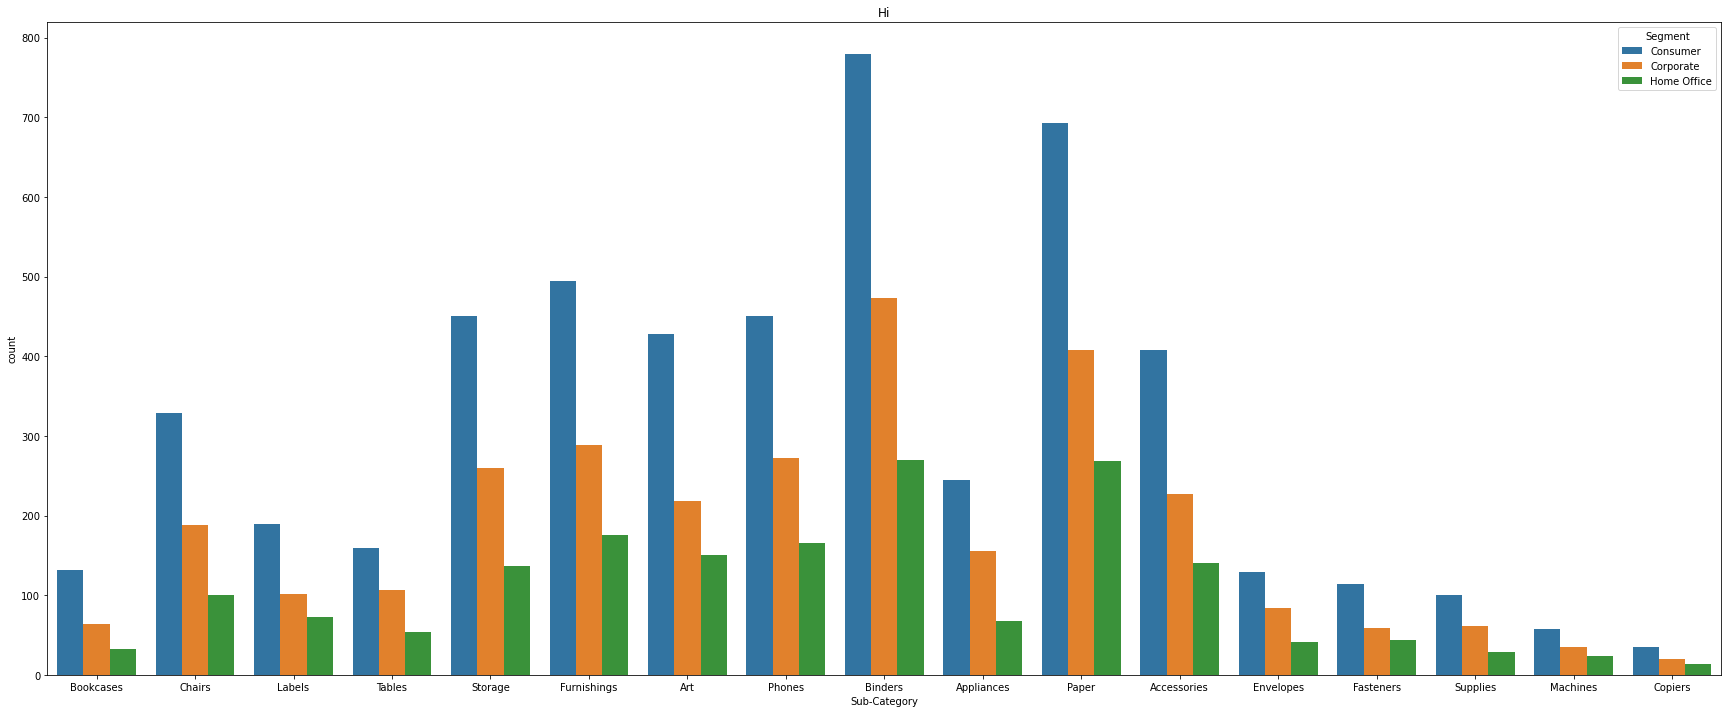

In [364]:
plt.figure(figsize=(30, 12))
sns.countplot(x="Sub-Category", data=df, hue="Segment")

plt.title("Hi")
plt.show()


In [365]:
targeturl = "https://gist.githubusercontent.com/abatko/ee7b24db82a6f50cfce02afafa1dfd1e/raw/dd88ce02f2cb920e8ff6fa66052d9ab8a72ffb5a/US%2520Zip%2520Code%2520Geolocations%2520from%25202018%2520Government%2520Data"
df2 = pd.read_csv(targeturl,header=0, encoding='utf-8')
df2

,ZIP,LAT,LNG
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158327,-66.932928
4,610,18.295366,-67.125135
...,...,...,...
33139,99923,56.000518,-130.037474
33140,99925,55.550203,-132.945947
33141,99926,55.138352,-131.470425
33142,99927,56.239062,-133.457924


In [366]:
df["Postal Code"]

0       42420
1       42420
2       90036
3       33311
4       33311
        ...  
9989    33180
9990    92627
9991    92627
9992    92627
9993    92683
Name: Postal Code, Length: 9994, dtype: int64

In [367]:
# df의 postal code와 df2의 zip 숫자 값이 같다면 
# df2의 LAT과 LNG를 따로 저장해줘

LAT = []
LNG = []
if df["Postal Code"] in df2["ZIP"]:
    for i in range():
        
    LAT.append(df2["LAT"])
    LNG.append(df2["LNG"])
    
    

IndentationError: expected an indented block (2649239595.py, line 9)

# 3

In [394]:
df = pd.read_excel("Pistachio.xlsx")
df

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,...,StdDev_RR,StdDev_RG,StdDev_RB,Skew_RR,Skew_RG,Skew_RB,Kurtosis_RR,Kurtosis_RG,Kurtosis_RB,Class
0,63391,1568.4050,390.3396,236.7461,0.7951,284.0984,0.8665,73160,0.6394,1.6488,...,17.7206,19.6024,21.1342,0.4581,0.6635,0.7591,2.9692,3.0576,2.9542,Kirmizi_Pistachio
1,68358,1942.1870,410.8594,234.7525,0.8207,295.0188,0.8765,77991,0.6772,1.7502,...,26.7061,27.2112,25.1035,-0.3847,-0.2713,-0.2927,1.9807,2.1006,2.2152,Kirmizi_Pistachio
2,73589,1246.5380,452.3630,220.5547,0.8731,306.0987,0.9172,80234,0.7127,2.0510,...,19.0129,20.0703,20.7006,-0.6014,-0.4500,0.2998,3.5420,3.6856,4.1012,Kirmizi_Pistachio
3,71106,1445.2610,429.5291,216.0765,0.8643,300.8903,0.9589,74153,0.7028,1.9879,...,18.1773,18.7152,29.7883,-0.6943,-0.6278,-0.7798,2.8776,2.8748,2.8953,Kirmizi_Pistachio
4,80087,1251.5240,469.3783,220.9344,0.8823,319.3273,0.9657,82929,0.7459,2.1245,...,23.4298,24.0878,23.1157,-0.9287,-0.8134,-0.4970,2.9915,2.8813,2.7362,Kirmizi_Pistachio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,85983,1157.1160,444.3447,248.8627,0.8284,330.8730,0.9823,87536,0.6799,1.7855,...,20.8474,20.8118,21.1175,-0.6994,-0.7071,-0.6963,2.8853,2.6599,2.6317,Siirt_Pistachio
2144,85691,2327.3459,439.8794,278.9297,0.7732,330.3107,0.8886,96439,0.6590,1.5770,...,21.2621,22.5004,21.5821,-0.5567,-0.4968,-0.6597,2.3022,2.2664,2.5161,Siirt_Pistachio
2145,101136,1255.6190,475.2161,271.3299,0.8210,358.8459,0.9888,102286,0.7584,1.7514,...,21.1262,20.0279,17.4401,-0.9072,-0.8790,-0.4470,3.3112,3.4306,3.0697,Siirt_Pistachio
2146,97409,1195.2150,452.1823,274.5764,0.7945,352.1718,0.9902,98376,0.7635,1.6468,...,19.3274,19.1782,19.8930,-0.9473,-0.8404,-0.3153,3.4237,2.9606,3.0033,Siirt_Pistachio


In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           2148 non-null   int64  
 1   Perimeter      2148 non-null   float64
 2   Major_Axis     2148 non-null   float64
 3   Minor_Axis     2148 non-null   float64
 4   Eccentricity   2148 non-null   float64
 5   Eqdiasq        2148 non-null   float64
 6   Solidity       2148 non-null   float64
 7   Convex_Area    2148 non-null   int64  
 8   Extent         2148 non-null   float64
 9   Aspect_Ratio   2148 non-null   float64
 10  Roundness      2148 non-null   float64
 11  Compactness    2148 non-null   float64
 12  Shapefactor_1  2148 non-null   float64
 13  Shapefactor_2  2148 non-null   float64
 14  Shapefactor_3  2148 non-null   float64
 15  Shapefactor_4  2148 non-null   float64
 16  Mean_RR        2148 non-null   float64
 17  Mean_RG        2148 non-null   float64
 18  Mean_RB 

In [396]:
df=df[['Area', 'Perimeter', 'Major_Axis', 'Minor_Axis', 'Eccentricity',
       'Eqdiasq', 'Solidity', 'Convex_Area', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', "Class"]]

In [397]:
#명목변수를 숫자로 치환
def encoder(series):
    dic = dict(zip(series.unique(), range(len(series.unique()))))
    result = series.apply(lambda x : dic[x])
    return result

In [398]:
df["Class"] = encoder(df["Class"])

C:\Users\user\AppData\Local\Temp\ipykernel_18380\2335280381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Class"] = encoder(df["Class"])


In [399]:
df.corrwith(df["Class"]).sort_values(ascending= False)

Class           1.000000
Minor_Axis      0.668126
Compactness     0.624939
Area            0.589226
Convex_Area     0.584618
Eqdiasq         0.577300
Perimeter       0.145290
Major_Axis      0.136845
Solidity        0.125347
Roundness       0.105768
Extent          0.100200
Eccentricity   -0.546759
Aspect_Ratio   -0.581469
dtype: float64

In [404]:
df.corr()

,Area,Perimeter,Major_Axis,Minor_Axis,Eccentricity,Eqdiasq,Solidity,Convex_Area,Extent,Aspect_Ratio,Roundness,Compactness,Class
Area,1.000000,0.115941,0.697782,0.795881,-0.358892,0.997399,0.363959,0.943877,0.331784,-0.424025,0.250423,0.551711,0.589226
Perimeter,0.115941,1.000000,0.094296,0.390740,-0.334483,0.113631,-0.671046,0.364474,-0.403916,-0.312373,-0.891777,0.044624,0.145290
Major_Axis,0.697782,0.094296,1.000000,0.272578,0.298836,0.705333,0.247822,0.661892,0.186830,0.265049,0.153592,-0.201121,0.136845
Minor_Axis,0.795881,0.390740,0.272578,1.000000,-0.816731,0.793155,-0.085556,0.890003,0.047442,-0.839078,-0.066594,0.773512,0.668126
Eccentricity,-0.358892,-0.334483,0.298836,-0.816731,1.000000,-0.352723,0.257060,-0.482713,0.080967,0.943751,0.171669,-0.846851,-0.546759
Eqdiasq,0.997399,0.113631,0.705333,0.793155,-0.352723,1.000000,0.372779,0.940651,0.340073,-0.423318,0.254242,0.549971,0.577300
Solidity,0.363959,-0.671046,0.247822,-0.085556,0.257060,0.372779,1.000000,0.042000,0.678599,0.177830,0.779134,0.226165,0.125347
Convex_Area,0.943877,0.364474,0.661892,0.890003,-0.482713,0.940651,0.042000,1.000000,0.122881,-0.522637,-0.007125,0.515907,0.584618
Extent,0.331784,-0.403916,0.186830,0.047442,0.080967,0.340073,0.678599,0.122881,1.000000,0.023303,0.512278,0.254064,0.100200
Aspect_Ratio,-0.424025,-0.312373,0.265049,-0.839078,0.943751,-0.423318,0.177830,-0.522637,0.023303,1.000000,0.115896,-0.896857,-0.581469


<AxesSubplot:>

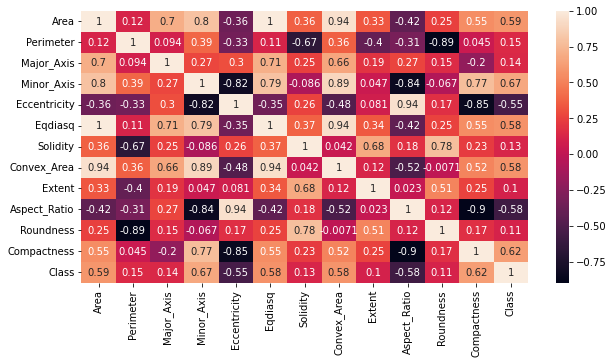

In [410]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)

In [413]:
df=df[['Perimeter', 'Minor_Axis', 'Eccentricity',
       'Solidity', 'Extent', 'Aspect_Ratio',
       'Roundness', 'Compactness', "Class"]]

<AxesSubplot:>

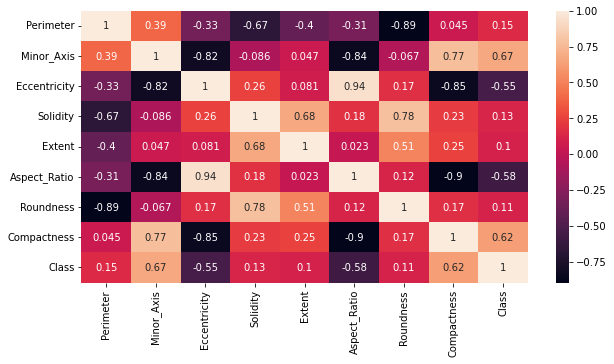

In [414]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)

In [419]:
df=df[['Minor_Axis',
       'Solidity', 'Extent',
       'Roundness', 'Compactness', "Class"]]

<AxesSubplot:>

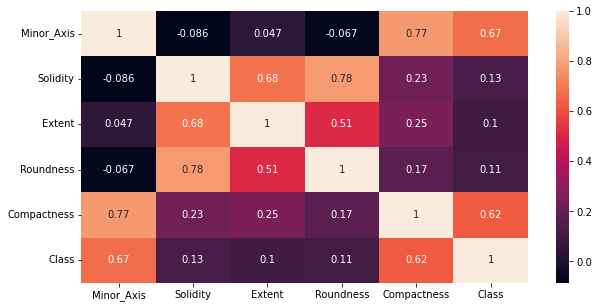

In [420]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)

In [428]:
from sklearn.model_selection import train_test_split

In [434]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

from sklearn.metrics import r2_score

In [430]:
X_train, X_test, y_train, y_test = train_test_split(df[['Minor_Axis', 'Solidity', 'Extent', 'Roundness', 'Compactness']], df["Class"])

model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()
model4 = RandomForestClassifier()
model5 = GradientBoostingClassifier()
model6 = xgb.XGBClassifier()
model7 = LGBMClassifier()

model1.fit(X_train,  y_train)
model2.fit(X_train,  y_train)
model3.fit(X_train,  y_train)
model4.fit(X_train,  y_train)
model5.fit(X_train,  y_train)
model6.fit(X_train,  y_train)
model7.fit(X_train,  y_train)

LGBMClassifier()

In [431]:
predict1 = model1.predict(X_train)
predict2 = model2.predict(X_train)
predict3 = model3.predict(X_train)
predict4 = model4.predict(X_train)
predict5 = model5.predict(X_train)
predict6 = model6.predict(X_train)
predict7 = model7.predict(X_train)

In [433]:
predict_avg = (predict1 + predict2 + predict3+ predict4+ predict5+ predict6+ predict7) / 7

In [439]:
predict_avg = np.round((predict1 + predict2 + predict3+ predict4+ predict5+ predict6+ predict7) / 7)

In [441]:
score = 0
for a, i in enumerate(predict_avg):
    if y_train.reset_index(drop = True)[a] == i:
        score += 1
    else:
        pass
score/len(y_train)

0.9987585350713842

In [436]:
model_name = ["LR", "KNN", "DT", "RF", "GB", "XGB", "LGBM", "VT"]
model1.score(X_train, y_train)

0.8609559279950342

<BarContainer object of 8 artists>

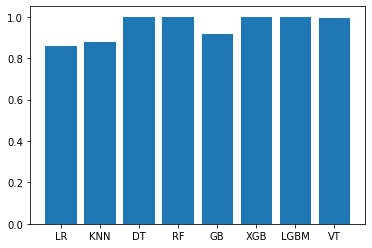

In [440]:
model_name = ["LR", "KNN", "DT", "RF", "GB", "XGB", "LGBM", "VT"]
scores = [model1.score(X_train, y_train), model2.score(X_train, y_train),
         model3.score(X_train, y_train), model4.score(X_train, y_train), 
         model5.score(X_train, y_train), model6.score(X_train, y_train),
         model7.score(X_train, y_train), r2_score(y_train, predict_avg)]
plt.bar(model_name, scores)

In [445]:
predict1 = model1.predict(X_test)
predict2 = model2.predict(X_test)
predict3 = model3.predict(X_test)
predict4 = model4.predict(X_test)
predict5 = model5.predict(X_test)
predict6 = model6.predict(X_test)
predict7 = model7.predict(X_test)
predict_avg = np.round((predict1 + predict2 + predict3+ predict4+ predict5+ predict6+ predict7) / 7)



In [446]:
score = 0
for a, i in enumerate(predict_avg):
    if y_train.reset_index(drop = True)[a] == i:
        score += 1
    else:
        pass
score/len(y_test)

0.5139664804469274

<BarContainer object of 8 artists>

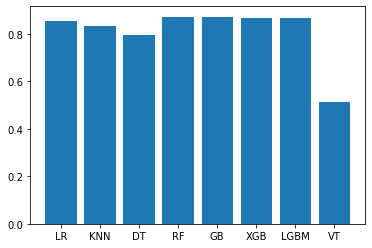

In [450]:
model_name = ["LR", "KNN", "DT", "RF", "GB", "XGB", "LGBM", "VT"]
scores2 = [model1.score(X_test, y_test), model2.score(X_test, y_test),
         model3.score(X_test, y_test), model4.score(X_test, y_test), 
         model5.score(X_test, y_test), model6.score(X_test, y_test),
         model7.score(X_test, y_test), score/len(y_test)]

plt.bar(model_name, scores2)

<BarContainer object of 8 artists>

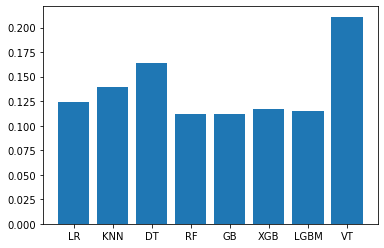

In [452]:
gap = []
for a, i in enumerate(scores):
    gap.append(i - scores2[a] **2)
plt.bar(model_name, gap)